Testing a Linear Equation Solver

In [43]:
import numpy as np
def solve(f, g, lims, e = 1e-1):
    check = lambda x: val(x) <= e
    dx = 1
    val = lambda x: abs(f(x) - g(x))
    diff = lambda x: abs((f(x) - g(x)) - (f(x + dx) - g(x + dx)))
    avg = lambda a, b: np.divide(a + b, 2)
    for x in lims:
        if check(x):
            return x, f(x)
    print(lims)    
    min_x = lims[0]
    min_diff = diff(min_x)
    max_x = lims[1]
    max_diff = diff(max_x)
    
    mid_x = avg(min_x, max_x)
    mid_diff = diff(mid_x)
    
    if check(mid_x):
        return mid_x
    print(min_diff, mid_diff, max_diff)
    if min_diff > mid_diff:
        if mid_diff > max_diff:
            return solve(f, g, [mid_x, max_x])
        else:
            return solve(f, g, [min_x, mid_x])
    print("None")
    
a = lambda x: -3 + (4 * x)
b = lambda x: 3 * x

solve(a, b, [1, 7])
    
    

[1, 7]
1 1.0 1
None


In [4]:
import numpy as np
from scipy.optimize import fsolve
def func(z):
    x = z[0]
    
    F = np.zeros(2)
    F[0] = 2 * x
    F[1] = x + 3
    return F
zGuess = np.array([1, 1])
z = fsolve(func,zGuess)
print(z)
        

[  -0.6        -243.92284499]
/Users/vishnusangli/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


## Intersection Solver
funcsolve() finds the first intersection between two functions in a given x-range
The intersection is dteremined with an inequality limit being less than e = 1e-4

In [8]:
exists = lambda x: x >= -np.inf
import numpy as np
def funcsolve(f, g, lims, e = 1e-4, step = 0.2, min_step = 0.001):
    diff = lambda x: np.power(f(x) - g(x), 2)
    deriv = lambda f, x: np.divide(f(x) - f(x - step), step) #Backward differentiation
    
    def is_converging(x):
        f_val = f(x)
        f_deriv = deriv(f, x)
        
        g_val = g(x)
        g_deriv = deriv(g, x)
        
        #If two lines can converge
        if f_val > g_val:
            return g_deriv > f_deriv
        elif f_val < g_val:
            return f_deriv > g_deriv
        else: #Solution found
            return True
    def could_converge(lim):
        '''
        Does the inequality check
        Needn't worry about equality in either case as would've been checked already
        '''
        start = f(lim[0]) < g(lim[0])
        end = f(lim[1]) < g(lim[1])
        return start ^ end
    
    x = lims[0]
    prevDiff = diff(x) if exists(f(x)) and exists(g(x)) else np.inf
    
    prev = True #Will increase runtime for faulty ones, but setting initial True will ignore certain cases
    prev_existx = x
    #Prioritizing correctness over efficiency
    while x <= lims[1]:
        '''
        Has converging switched from True to Negative
        '''
        if exists(f(x)) and exists(g(x)):

            if diff(x) <= e: #Base condition
                return x, True

            curr = is_converging(x)
            prev_existx = x
            if prev and not curr: #Was converging and is not now
                pot_lim = [x - step, x]
                if could_converge(pot_lim) and step >= min_step: #Could it have converged; include a lower limit on the step
                    return funcsolve(f, g, pot_lim, step = np.divide(step, 10))#Recursive call with smaller range and step
            prev = curr
        x += step
    return prev_existx, False


In [6]:
a = 1/0 if 0 else 0

In [9]:
def f(x):
    return  2* x

def g(x):
    return 3*x

funcsolve(f, g, [1, 10])

(9.999999999999996, False)

## Starter Code for the circle fucntion format
Main issue when useing regular methods is the avoidance of other x-vals in a range that are outside the circle.
These functions must be used as a single var function, not numpy list-functions. 

np.Nan is curious in it's inequalities, so the only way to check is if it's greater than -np.inf. Any valid number returns True, but np.NaN returns false

In [5]:
print(np.NaN == np.NaN)
print(np.NaN > np.NaN)
print(np.NaN > np.NaN)
print(np.NaN > -np.inf)

False
False
False
False


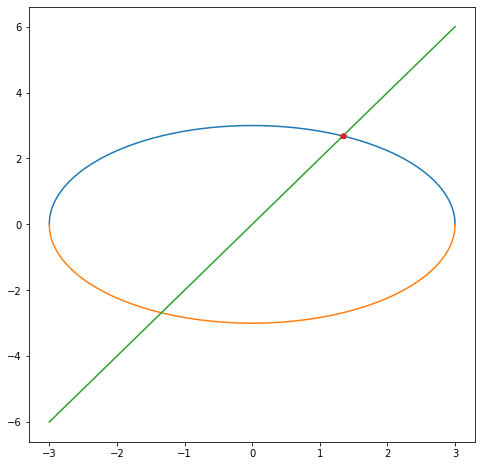

(0, False)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def circle(anchor, radius):
    def give(x):
        val = radius**2 - np.power(x - anchor[0], 2)
        if val < 0:
            return np.NaN
        return np.sqrt(val) + anchor[1]
    return give

func = circle([0, 0], 3)
x = np.linspace(-3, 3, 1000)
y = [func(a) for a in x]
y2 = [-func(a) for a in x]
plt.figure(figsize = (8, 8))
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, f(x))
plt.plot(1.34, f(1.34), 'p')
plt.show()
funcsolve(f, func, [-10, 10])
#Need to give the stepper x vals to include both min and max

In [14]:
def circ_func(anchor, radius, startPhi, endPhi, upper = True):
    '''
    Right now this function does not support lower semicircle
    Need to add it
    '''
    startPhi = rad_reduce(startPhi)
    endPhi = rad_reduce(endPhi)
    if upper:
        assert startPhi >= 0 and endPhi >= 0, "Circle angles need to be of same semicircle type"
    else:
        assert startPhi <= 0 and endPhi <= 0, "Circle angles need to be of same semicircle type"
    def return_func(x):
        val = radius**2 - np.power(x - anchor.xPos, 2)
        if val < 0:
            return np.NaN
        
        val = np.sqrt(val)
        if not upper:
            val = - val
        y = val + anchor.yPos
        angle = anchor.angle(Point(x, y))
        #print(angle, Point(x, y))
        if startPhi <= angle <= endPhi:
            return y
        else:
            return np.NaN

    return return_func

use = circ_func(Point(0, 0), 1, - np.pi/2, 0, False)


In [15]:
use(0.6)

-0.8

## Function that breaks a function and range into the grids it passes through

In [16]:
def gridgive(f, lims, e = 1e-4, deriv_diff = 1e-2):
    is_adj = lambda a, b: abs(a[0] - b[0]) + abs(a[1] - b[1]) == 1
    deriv = lambda f, x, diff: np.divide(f(x + diff) - f(x), diff)
    
    def tending_to(f, start, end):
        '''
        does point 1 seem to lead to point 2?
        involves point1 + (delta x * deriv)
        '''
        d = deriv(f, start.xPos, deriv_diff)
        pred_val = start.yPos + (d * deriv_diff)
        return int(pred_val) == int(end.yPos)
    
    def connect():
        '''
        given two boxes, connect all in between
        '''
        
        pass
    x = int(lims[0])
    y = f(lims[0])
    prev =  [int(x), int(y)]
    grids = [prev]
    x += 1
    while x < lims[1]:
        y = f(x)
        curr = [x, int(y)]
        grids.append(curr)
        if not is_adj(prev, curr):
            begin = [x - 1, int(y)]
            
        
        if not is_adj(prev, curr) or not tending_to():
            continue
        
        
        x += 1
        

In [17]:
def grids_trial(f, lims):
    y = f(lims[0])
    x = int(lims[0])
    
    prev = [x, int(y)]
    grids = [prev]
    
    x += 1
    run = True
    while run:
        if x > lims[1]:
            x = lims[1]
            run = False
        
        y = f(x)
        if y > - np.inf:
            #print(type(y))
            y = int(y)
            curr = [x, y]
            grids.append(curr)
            if curr[1] != prev[1]: #Same row, adjacent
                loop_use = [x - 1, y]
                grids.append(loop_use)
                if loop_use[1] > prev[1]:
                    for m in range(prev[1], loop_use[1]):
                        grids.append([loop_use[0], m])
                else:
                    for m in range(prev[1], loop_use[1], -1):
                        grids.append([loop_use[0], m])

            #Add all 4
            prev = curr
        x += 1
    return grids
        

In [12]:
def f(x):
    return  2*x


use = circle([0, 0], 10)
make = use
lims = [0, 20]
vals = grids_trial(make, lims)
print(vals)

x = np.linspace(lims[0], lims[1], 100)
y = np.array([make(a) for a in x])


plt.figure(figsize = (10, 10))
plt.plot(x, y, '-r')
x_axis = np.arange(0, max(x) + 1, 1)
y_axis = np.arange(0, max(y) + 1, 1)
for x in vals:
    plt.plot(x[0], x[1], 'pb')
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.grid()
plt.show()

'''
Implement the tending to function
reformat to use point
create the Grid Data Structure and use that
'''

NameError: name 'circle' is not defined

In [ ]:
funcsolve(f, func, [0, 10])

In [11]:
class gridEngine:
    def __init__(self, height, width):
        self.height = height
        self.width = width
        self.grid = self.make_grid()
        
    def make_grid(self):
        main = []
        for x in range(width):
            row = []
            for y in range(height):
                row.append([])
            main.append(row)
    
    def access(self, x, y):
        assert x < width, "Invalid grid width"
        assert y < height, "invalid grid height"
        
        to_return = self.grid[x][y]
        return to_return
    
    def add_to(self, x, y, elem):
        loc = self.access(x, y)
        if not elem in loc:
            loc.append(elem)

    def grid_search(mainfunc, lims):
        '''
        The grid search, but altered to incorporate a list-based mainfunc
        '''
        y = mainfunc(lims[0])
        x = int(lims[0])

        prev = [x, int(y)]
        grids = [prev]
        potential = self.check_box(mainfunc, x, int(y))
        if potential < np.inf:
            True, potential, grids
        
        x += 1
        run = True

        while run:
            if x > lims[1]:
                x = lims[1]
                run = False
            y = mainfunc(x)
            if y > -np.inf:
                red_y = int(y)
                pots = [self.check(mainfunc, x, red_y)]
                grids.append([x, red_y])
                loop_x = x - 1
                if red_y > prev[1]: #If they're not adjacent
                    for y_use in range(prev[1], red_y, 1):
                        pots.append([self.check(mainfunc, loop_x, y_use)])
                        grids.append([loop_x, red_y])
                else:
                    for y_use in range(prev[1], red_y, -1):
                        pots.append([self.check(mainfunc, loop_x, y_use)])
                        grids.append([loop_x, red_y])
                

                    grids.append([loop_x, red_y])
                prev = [x, red_y]
                if any([a < np.inf for a in pots]):
                    return True, min(pots), grids

            x += 1
        return False, np.inf, grids

            

    def check_box(self, mainfunc, x, y):
        elems = self.access(x, y)
        obstructs = []
        for e in elems:
            success, val = find_obstruct(mainfunc, e.funcs, e.lims)
            if success:
                obstructs.append(val)
        if obstructs:
            return min(obstructs)
        else:
            return np.inf


    def find_obstruct(mainfunc, funcs, lims):
        '''
        Takes in an elemFunc
        
        Returns -- boolean, endPoint
        boolean - if obstruction was found
        enPoint - the obstruction (if found), else None
        endPoint will be the max line of sight if no obstruction is found

        with ranged elemfuncs, range is implicit, needs some way of calculation
        TrackElems could have min_x, max_x (line elems already have as elem.points, 
        [anchor_x - rad, anchor_x + rad] for turn elems)
        Questions: 
        - will minx, maxx be reqd or can be ooptional args?
        - should use trackelem as arg or funcs?

        With minx, maxx as inputed args, trackelem needn't be an arg

        list of mainfuncs, lims - input args
        Search through grid-method
        if overlapping grid found: do the mainfuncs-funcs obstruction check
        Keep empty obstructions list outside, append those found.
        At the end of the given grid box search, check if obstruction found and follow same exit procedure
        '''
        obstructions = []
        for f in funcs:
            x_val, success = funcsolve(mainfunc, f, lims)
            if success:
                obstructions.append(x_val)
        if any(obstructions):
            xval = min(obstructions)
            yval = mainfunc(xval)
            assert yval > -np.inf, "Invalid intersection result from funcsolve"
            return True, xval
        else:
            #Potential error, does mainfunc(lims[1]) exist? Must ensure
            #Max pos here is only needed in line of sight, can just implement anglepoint_end() in the function that calls this one
            return False, np.in

    
    def register_track(elem):
        '''
        Takes the walls of the track elem and returns whether it's successful
        True - can save, no obstructions
        False - didn't save, obstructions
        '''
        grids_passed = []
        for f in elem.funcs:
            success, inters, grids = self.grid_search(f, elem.lims):
            if success:
                return False
            grids_passed += grids
        return grids_passed

        
'''
Inspired to write an elemFunc class, that stores some function and it's limits


Track: interpret each track elem, register in grid engine
track funcs 
-is_collide() - find_obstruct on all 4 sides of car
-lineof_sight() - find_obstruct in each line, return dict with angle as key
'''
        

SyntaxError: invalid syntax (<ipython-input-11-8540df8586be>, line 67)

In [19]:
a = [None, None, 2]
b = [1, 2, 3]
a + b

[None, None, 2, 1, 2, 3]

In [ ]:
a = [1, 2, 3]
not 1 in a

## Solving the circle characteristcs along with defining the Point system

In [8]:

class Point:
    '''
    API used for reference points in track elements
    Standard --- Angle Radian System
    '''
    def __init__(self, xPos, yPos, dir = None) -> None:
        self.xPos = xPos
        self.yPos = yPos

        self.dirVec = dir #Directional vector of movement & following track creation


    def angle(self, other):
        '''
        Common format to return in Radians
        '''
        d = np.inf
        if other.xPos - self.xPos != 0:
            d = np.divide(other.yPos - self.yPos, other.xPos - self.xPos)
        angle = np.arctan(d) 
    
        if (angle < 0 and self.yPos < other.yPos):
            
            angle += np.pi
        elif d == np.inf and self.yPos > other.yPos:
            
            angle = -np.pi/2
        
        elif angle > 0 and self.yPos > other.yPos:
            
            angle = np.pi - angle
        elif angle == 0 and self.xPos > other.xPos:
            
            angle = np.pi
            
        
    
        return angle

    
    def distance(self, other):
        '''
        Returns distance to another point
        '''
        delt_y = np.power(other.yPos - self.yPos, 2)
        delt_x = np.power(other.xPos - self.xPos, 2)
        to_return = np.sqrt(delt_x + delt_y)
        return to_return
    
    def __str__(self):
        return 'Point[{0:4.4f}, {1:4.4f}]|'.format(self.xPos, self.yPos) + str(self.dirVec)
    
    def __repr__(self):
        return 'Point[{0:4.4f}, {1:4.4f}]|'.format(self.xPos, self.yPos) + str(self.dirVec)

def rad_reduce(x):
    if x < 0:
        x = (2 * np.pi) + x
        
    while x > 2 * np.pi:
        x -= 2 * np.pi
    
    if x > np.pi:
        x -= 2 * np.pi
    
    return x

def frame_angle(lims, theta):
    theta = rad_reduce(theta)
    
    '''
    If a valid angle is give, only 1 while loop would be used
    If invalid angle is given, first loop runs until overshot, after which second doesn't, returning 
    an angle that is beyond range
    '''
    while theta < lims[0]:
        theta += (2 * np.pi)
        
    while theta > lims[1]:
        theta -= (2 * np.pi)
    
    if lims[0] <= theta <= lims[1]:
        return theta
    else:
        print(lims, theta)
        return None


def get_angle(start, end):
    d = np.divide(end[1] - start[1], end[0] - start[0])
    angle = np.arctan(d) 
    
    if (angle < 0 and start[1] < end[1]):
        angle += np.pi
        
    elif angle > 0 and start[1] > end[1]:
        angle = np.pi - angle
    
    return angle

def get_distance(start, end):
    distance = np.sqrt(np.power(start[1] - end[1], 2) + np.power(start[0] - end[0], 2))
    return distance
    
    
def turnCalc(start, end):
    '''
    return anchor, angle, and rotation angle
    Next stage -- radius changing with track width
    '''
    halfpi = np.pi/2
    deriv = rad_reduce(start.dirVec)
    
    
    angle = start.angle(end)

    angle = frame_angle([deriv - halfpi, deriv + halfpi], angle) 

    if angle == None:
        return
    #Now both angles are in radians
    standard = deriv - halfpi
    if deriv < angle:
        standard = deriv + halfpi
    distance = start.distance(end)
    theta = angle - standard
    radius = np.divide(distance, 2 * np.cos(theta))
    phi = np.pi - (2 * abs(rad_reduce(theta)))
    
    anchor = Point(start.xPos + (radius * np.cos(standard)), start.xPos + (radius * np.sin(standard)))
    print([anchor.angle(start), anchor.angle(end)])
    rotate = min([anchor.angle(start), anchor.angle(end)])

    return anchor, radius, phi, rotate

In [9]:
start = Point(100, 100, np.pi/2)
end = Point(276, 290)
deriv = 90

turnCalc(start, end)

[3.141592653589793, 1.6472617796660995]


(Point[290.5568, 100.0000]|None,
 190.55681818181816,
 1.4943308739236933,
 1.6472617796660995)

In [10]:
start = Point(0, 0)
end = Point(0, -1)
start.angle(end)

-1.5707963267948966

In [11]:
'''
Vars to get -- 
'''
gen = lambda a, b: (np.random.random() * (b-a)) + a
for x in range(100):
    pos = [gen(-10, 10), gen(-10, 10)]
    radius = gen(0.5, 8)
    phi = gen(0.1, np.pi)
    rotate = gen(0, 2 * np.pi)
    
    start = [radius * np.cos(rotate), radius * np.sin(rotate)]
    end = [radius * np.cos(rotate + phi), radius * np.sin(rotate + phi)]
    
    print(pos, radius, phi, rotate)

[-4.887077390886317, 2.553467541171079] 7.5196818634744895 2.510469731405888 3.2486519944776986
[2.687416808413017, -4.682290493636447] 6.320456137775382 2.1162701456458533 2.909663434678761
[-8.238155646724504, -9.966478920803404] 2.6177423382628127 2.8215506314507457 2.087649294342123
[0.7541325382069335, 5.929190694107465] 6.223338374905077 0.37882529863533165 0.03848283050318225
[-9.050123042503449, -2.815013622719203] 3.2295089054752055 2.3852717541274386 5.24763065772443
[3.7252245289525217, 9.08810735774313] 1.008508338054201 0.14282450824567172 0.6180906943583213
[-3.754745575058185, -9.640340484466183] 1.0417960477991381 2.0660890562030114 0.5315100793368414
[1.8876996491042792, -0.018559365328762567] 0.8304111195682182 3.0851448478100476 1.4458371743573026
[3.6151447619391135, -6.521274903580776] 2.449378726660316 0.7690131713745606 3.8151643212789055
[3.6556226492041297, -3.7361573761488494] 6.095617166384243 1.0747176376840255 1.9267375491896923
[-7.098338029817479, 7.11212

In [12]:
rad_deg = lambda x: x * (180./np.pi)
deg_rad = lambda x: x * (np.pi/180.)

## Starter Logic for the Line Element Track wireFrame

Point[0.0000, 0.0000]|1.5707963267948966
0.0


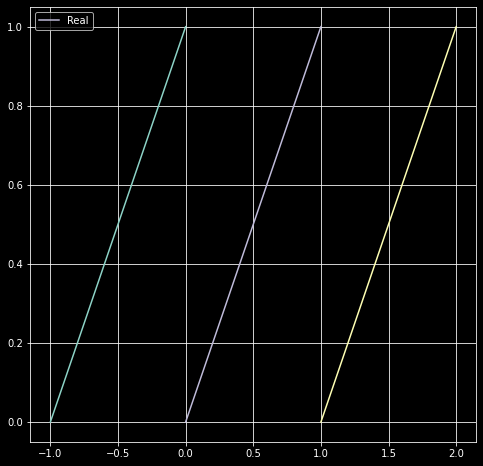

Point[-1.0000, 0.0000]|None Point[1.0000, 0.0000]|None


In [13]:
halfpi = np.pi/2
start = Point(0, 0, deg_rad(90))
print(start)
end = Point(1, 1)
width = 1
perp = start.dirVec - halfpi
print(perp)
diff = Point(width * np.cos(perp), width * np.sin(perp))
lower = Point(start.xPos - diff.xPos, start.yPos - diff.yPos)
upper = Point(start.xPos + diff.xPos, start.yPos + diff.yPos)

lower_pair = Point(end.xPos - diff.xPos, end.yPos - diff.yPos)
upper_pair = Point(end.xPos + diff.xPos, end.yPos + diff.yPos)
plt.figure(figsize = (8, 8))
plt.plot([lower.xPos, lower_pair.xPos], [lower.yPos, lower_pair.yPos])
plt.plot([upper.xPos, upper_pair.xPos], [upper.yPos, upper_pair.yPos])
plt.plot([start.xPos, end.xPos], [start.yPos, end.yPos], label = 'Real')
plt.legend()
plt.grid()
plt.show()
print(lower, upper)




In [1]:
a = ''
a or False

False

In [4]:
class a:
    def __init__(self):
        self.points = 1

class b(a):
    def __init__(self):
        super().__init__()
        print(self.points)
first = b()
first.points

1


1

In [8]:
import numpy as np
5 * np.divide(-1, 0)

<ipython-input-8-e3ee0c48ed45>:2: RuntimeWarning: divide by zero encountered in true_divide
  5 * np.divide(-1, 0)


-inf

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
class Point:
    '''
    API used for reference points in track elements
    Standard --- Angle Radian System
    '''
    def __init__(self, xPos, yPos, dir = None) -> None: 
        self.xPos = xPos
        self.yPos = yPos

        self.dirVec = dir #Directional vector of movement & following track creation


    def angle(self, other):
        '''
        Common format to return in Radians
        '''
        d = np.inf
        if other.xPos - self.xPos != 0:
            d = np.divide(other.yPos - self.yPos, other.xPos - self.xPos)
        angle = np.arctan(d) 
    
        if (angle < 0 and self.yPos < other.yPos):
            angle += np.pi #Negative angles in quadrant 4 to quadrant 2
        
        elif d == np.inf and self.yPos > other.yPos:
            angle = -np.pi/2 #90 degrees to 270 degrees

        elif angle > 0 and self.yPos > other.yPos:
            angle = - np.pi + angle #Positive angles in quadrant 1 to quadrant 3
        
        elif angle == 0 and self.xPos > other.xPos:
            angle = np.pi
        
    
        return angle

    
    def distance(self, other):
        '''
        Returns distance to another point
        '''
        delt_y = np.power(other.yPos - self.yPos, 2)
        delt_x = np.power(other.xPos - self.xPos, 2)
        to_return = np.sqrt(delt_x + delt_y)
        return to_return
    
    def gradient(self, other):
        '''
        Returns gradient
        '''
        val = np.divide(self.yPos - other.yPos, self.xPos - other.xPos)
        return val
    
    def givePos(self):
        return [self.xPos, self.yPos]
    
    def __str__(self):
        return 'Point[{0:4.4f}, {1:4.4f}]|'.format(self.xPos, self.yPos) + str(self.dirVec)
    
    def __repr__(self):
        return 'Point[{0:4.4f}, {1:4.4f}]|'.format(self.xPos, self.yPos) + str(self.dirVec)

In [56]:
class math_func:
    def __init__(self, points, line_bool, args = True):
        '''
        A revised Function that class that can produce various aspects of the enclosed function when needed
        Catered towards three different types of functions:
        -Linear Functions with usable gradient
        -Vertical lines
        -Circular functions

        If line function: 
        points gives [x1, y1, x2, y2]

        if circ function:
        points gives [anchorPoint, radius, startPhi, endPhi]
        '''
        self.points = points
        self.line_bool = line_bool
        self.args = args
        if line_bool:
            if self.points[0] == self.points[2]:
                self.grad = np.inf
                self.lims = [self.points[0], self.points[0]]
                self.func = self.vert_func #Make the vertical function
            else:
                self.grad = loc_gradient(*self.points) #Make the regular function
                self.lims = [self.points[0], self.points[2]]
                self.lims.sort() #Could be the opposite way
                print(self.lims)

                self.func = self.line_func
                
        else:
            self.angle_range = [rad_reduce(self.points[2]), rad_reduce(self.points[3])]
            self.angle_range.sort()
            

            if args:
                assert self.angle_range[0] >= 0, "Circle angles need to be of same semicircle type"
            else:
                assert self.angle_range[1] <= 0, "Circle angles need to be of same semicircle type"
            self.lims = self.det_circ_range()
            self.func = self.circ_func

    def find_overlap(self, other):
        '''
        Finds an overlap in the ranges of two functions
        Returns success boolean, [min_x, max_x]
        if failed, -- False, None
        '''
        other_lims = other.lims
        use_range = [max(self.lims[0], other_lims[0]), min(self.lims[1], other_lims[1])]
        if use_range[0] > use_range[1]:
            return False, None
        else:
            return True, use_range
            print (use_range)

    def det_circ_range(self):
        '''
        Determining the exact x range for the function
        At this point, we have hte max and min angle and the hemisphere-confirmed angles
        Idea for interpretation here -- all values will lie only between the max and min angle, nothing beyond
        since this angle range does not cross the semicircle border
        Given points element dictionary here
        0 - anchorPoint
        1 - radius
        2 - StartPhi
        3 - endPhi
        '''
        pot = [self.points[0].xPos + (self.points[1] * np.cos(a)) for a in self.lims]
        pot.sort()
        return pot

    
    def circ_func(self, x):
        '''
        The Circle function
        Given points element dictionary here
        0 - anchorPoint
        1 - radius
        2 - StartPhi
        3 - endPhi
        '''
        if x < self.lims[0] or x > self.lims[1]:
            return np.NaN
        
        val = self.points[1]**2 - np.power(x - self.points[0].xPos, 2)        
        val = np.sqrt(val)
        if not self.args:
            val = - val
        y = val + anchor.yPos
        return y
        

    def line_func(self, x):
        '''
        The regular linear function
        Assumes points is comprised of startt and end points:
        [x1, y1, x2, y2]
        '''
        if x < self.lims[0] or x > self.lims[1]:
            return np.NaN
        delt_y = x - self.points[0]
        delt_y = delt_y * self.grad
        return delt_y + self.points[1]


    def vert_func(self, x, other_y):
        '''
        The vertical line function
        '''
        assert x == self.points[0]

        if self.points[1] <= other_y <= self.points[3]:
            return other_y
        else:
            return np.NaN
    '''
    Comparison functions below
    Needed to incorporate the np.NaN thing
    All functions used are singularly piecewise. If they start at a given point and end, they don't restart somewhere
    If f(x1) exists and f(x2) does not, the upper lim lies between both. Since we know the upper and lower lims, we don't need to ever run
    an np.NaN-returning function (when executed correctly)
    '''
    def deriv(self, x, step):
        '''
        Gives the function's derivative at a particular point
        '''
        if self.line_bool == True:
            return self.grad
        
        if not exists(self.func(x)) or not exists(self.func(x - step)):
            return np.NaN
        else:
            return np.divide(self.func(x) - self.func(x - step), step)

    def diff(self, x, other):
        '''
        Gives the difference between two functions
        '''
        if not exists(self.func(x)) or not exists(other.func(x)):
            return np.NaN
        else:
            return np.sqrt(np.power(self.func(x) - other.func(x),2))
    
    def is_converging(self, x, other, step):
        '''
        Same is_converging function, but here with np.NaN support
        '''
        if not exists(self.func(x)) or not exists(other.func(x)) or not exists(self.func(x - step)) or not exists(other.func(x - step)):
            return False
       
        elif self.func(x) < other.func(x):
            return self.deriv(x, step) > other.deriv(x, step)
        elif self.func(x) > other.func(x):
            return self.deriv(x, step) < other.deriv(x, step)
        else: #Solution is found
            return True

    def did_converge(self, x, other, step):
        '''
        could_coverge, but with np.NaN support
        '''
        
        start = self.func(x - step) < other.func(x - step)
        end = self.func(x) < other.func(x)

        return start ^ end
    

In [57]:
def loc_gradient(x1, y1, x2, y2):
    '''
    Returns gradient
    '''
    val = np.divide(y1 - y2, x1 - x2)
    return val

exists = lambda x: x >= -np.inf




In [66]:
def systemsolve(f_obj, g_obj, e = 1e-4, step = 0.2, conten_divis = 30, count = 3):
    '''
    This is the potential candidate for funcsolve's successor
    The plans for change are to expedite the range and elimination check
    count - flagpoint for the recursive check, when end when reachedd 0
    '''

    success, lims = f_obj.find_overlap(g_obj)
    if not success:
        return False, None
    
    if lims[0] == lims[1]:
        if f_obj.func(lims[0]) == g_obj.func(lims[0]):
            return True, lims[0]

        else:
            return False, None
        #Do the y check and the value

    new_step = np.divide(lims[1] - lims[0], conten_divis)
    step = min(step, new_step) #Take the one that's more suited to the range 
    #0.2 does not fit small ranges, like 0.9

    x = lims[0]
    prev_con = True
    
    run = True
    while run:
        if exists(f_obj.func(x)) and exists(g_obj.func(x)) and exists(f_obj.func(x - step) and exists (g_obj.func(x - step))):


            if x > lims[1]:
                x = lims[1]
                print (x)
                run = False
            
            if f_obj.diff(x, g_obj) <= e:
                return True, x
            curr_con = f_obj.is_converging(x, g_obj, step)
            '''
            Do not need to confirm if both functions exist in the range
            '''
            if prev_con and not curr_con:
                if f_obj.did_converge(x, g_obj, step) and count > 0:
                    return systemsolve(f_obj, g_obj, step = np.divide(step,10), count = count -1)
            prev_con = curr_con
        x += step
    return False, x - step
     
            
        



In [67]:
pts = [3, 6, 8, 12]
pts2 = [4, 5, 7, 9]

test1 = math_func(pts, line_bool = True)

test2 = math_func(pts2, line_bool = True)



[3, 8]
[4, 7]


In [68]:
test1.find_overlap(test2)

(True, [4, 7])